# Logistic Regression

In its most basic form, logistic regression target value is a binary variable (**binary classification**).

<img src="resources/logistic_regression.png" width = "600">

The Logistic function transforms real-valued input to an output number y between 0 and 1, interpreted as the probability the input object belongs to the positive class, given its input features.

------------

## Logistic regression for 2 input features
<img src="resources/logistic_regression_2.png" width = "400">

------------

## Extra notes
- As for Ridge and Lasson regressions, regularization can be applied to a logistic regression model. By default (on sklearn), L2 regularization is on (ridge regression).
- Parameter C controls the amount of regularization (default 1.0)
- For SVMs and Logistic regressions, higher values of C correspond to less regularization.
- With large values of C, logistic regression tries to fit the training data as well as possible. The smaller the values of C, the closer the coefficients are to 0.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import warnings

warnings.filterwarnings('ignore')

In [2]:
# Datasets
from sklearn.datasets import make_regression, make_friedman1, make_classification, make_blobs
from sklearn.datasets import load_breast_cancer
from utils.adspy_shared_utilities import load_crime_dataset

X_R1, y_R1 = make_regression(n_samples = 100, n_features = 1, n_informative = 1, bias = 150.0, noise = 30, random_state = 0)
X_F1, y_F1 = make_friedman1(n_samples = 100, n_features = 7, random_state = 0)
X_C2, y_C2 = make_classification(n_samples = 100, n_features = 2, n_redundant = 0, n_informative = 2, n_clusters_per_class = 1, flip_y = .1, class_sep = .5, random_state = 0)
X_D2, y_D2 = make_blobs(n_samples = 100, n_features = 2, centers = 8, cluster_std = 1.3, random_state = 4)
y_D2 = y_D2 % 2


# Breast cancer dataset for classification
cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

# Communities and Crime dataset
(X_crime, y_crime) = load_crime_dataset('data/CommViolPredUnnormalizedData.txt')

# Load data
fruits = pd.read_table('data/fruit_data_with_colors.txt')

### Logistic regression for binary classification on fruits dataset using height, width features (positive class: apple, negative class: others)

A fruit with height 6 and width 8 is predicted to be: an apple
A fruit with height 10 and width 7 is predicted to be: not an apple
--------------------------------------------------
SCORES

Accuracy of Logistic regression classifier on training set: 0.80
Accuracy of Logistic regression classifier on test set: 0.73


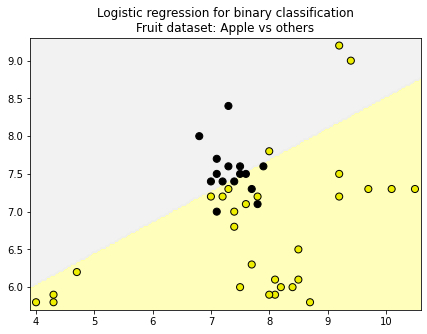

In [3]:
# EXAMPLE

from sklearn.linear_model import LogisticRegression
from utils.adspy_shared_utilities import plot_class_regions_for_classifier_subplot

#### Data filtering and transformation
X_fruits_2d = fruits[['height', 'width']]
y_fruits_2d = fruits['fruit_label']

y_fruits_apple = y_fruits_2d == 1   # make into a binary problem: apples vs everything else

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_fruits_2d, y_fruits_apple, random_state = 0)

# Model selection and training
clf = LogisticRegression(C=100).fit(X_train, y_train)

# Matplotlib plot and axes
fig, subaxes = plt.subplots(1, 1, figsize=(7, 5))

# Plot
plot_class_regions_for_classifier_subplot(clf, X_train, y_train, None, None, 'Logistic regression for binary classification\nFruit dataset: Apple vs others', subaxes)

#### Example predictions
# For apple prediction
h = 6
w = 8
prediction = clf.predict([[h,w]])[0]
transformed_prediction = ['not an apple', 'an apple'][prediction]
print(f'A fruit with height {h} and width {w} is predicted to be: {transformed_prediction}')

# For apple prediction
h = 10
w = 7
prediction = clf.predict([[h,w]])[0]
transformed_prediction = ['not an apple', 'an apple'][prediction]
print(f'A fruit with height {h} and width {w} is predicted to be: {transformed_prediction}')

#### Scores
print("-" * 50)
print("SCORES\n")
# Training score
train_score = clf.score(X_train, y_train)
# Test score
test_score = clf.score(X_test, y_test)

print(f'Accuracy of Logistic regression classifier on training set: {train_score:.2f}')
print(f'Accuracy of Logistic regression classifier on test set: {test_score:.2f}')

### Logistic regression on simple synthetic dataset

Accuracy of Logistic regression classifier on training set: 0.81
Accuracy of Logistic regression classifier on test set: 0.84


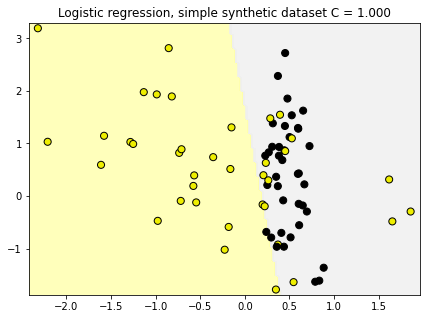

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2, random_state = 0)

# Matplotlib figure
fig, subaxes = plt.subplots(1, 1, figsize=(7, 5))

# Model selection and training
clf = LogisticRegression().fit(X_train, y_train)

# Plot
title = 'Logistic regression, simple synthetic dataset C = {:.3f}'.format(1.0)
plot_class_regions_for_classifier_subplot(clf, X_train, y_train, None, None, title, subaxes)

# Training score
train_score = clf.score(X_train, y_train)
# Test score
test_score = clf.score(X_test, y_test)

print(f'Accuracy of Logistic regression classifier on training set: {train_score:.2f}')
print(f'Accuracy of Logistic regression classifier on test set: {test_score:.2f}')
     

### Logistic regression regularization: C parameter

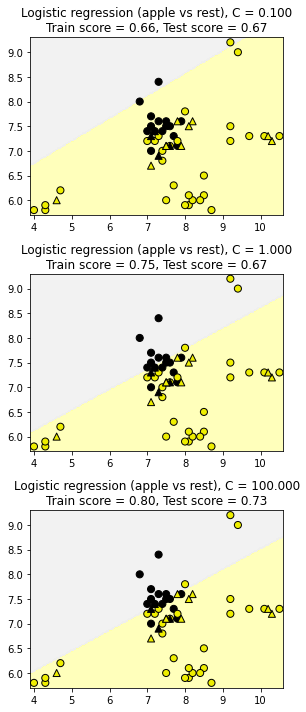

In [5]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_fruits_2d, y_fruits_apple, random_state=0)

# Matplotlib figure
fig, subaxes = plt.subplots(3, 1, figsize=(4, 10))

# Iterate over several C examples
for this_C, subplot in zip([0.1, 1, 100], subaxes):
    # Model selection and training
    clf = LogisticRegression(C=this_C).fit(X_train, y_train)

    # Plot
    title ='Logistic regression (apple vs rest), C = {:.3f}'.format(this_C)
    plot_class_regions_for_classifier_subplot(clf, X_train, y_train, X_test, y_test, title, subplot)

plt.tight_layout()

### Application to real dataset

In [6]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)

# Model selection and training
clf = LogisticRegression().fit(X_train, y_train)

# Scores
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)

# Results
print('Breast cancer dataset')
print(f'Accuracy of Logistic regression classifier on training set: {train_score:.2f}')
print(f'Accuracy of Logistic regression classifier on test set: {test_score:.2f}')

Breast cancer dataset
Accuracy of Logistic regression classifier on training set: 0.96
Accuracy of Logistic regression classifier on test set: 0.96
